# Team Project [Hidden Bandit Problem]

튜토리얼 코드는 실험을 위해 손수 구현한 Bandit을 이용하여 알고리즘을 테스트하였습니다.
그랬기 때문에 사실상 우리는 Bandit의 성공확률을 정확히 알고 있는 상태였습니다.

그러나 실제 Bandit 문제에서는 Bandit의 성공확률을 모르는 경우가 많습니다.
따라서 주어진 자원 하에서 알고리즘을 통해 Bandit의 성공확률을 유추할 필요가 있습니다.
이를 위해 여러 시각화도구로 MAB 알고리즘이 Bandit을 학습해나가는 과정을 살펴볼 필요가 있습니다.

Team Project의 진행 프로세스는 다음과 같습니다.
1. 학생들이 제공된 실험용 벤딧(HINT.ipynb)을 작성하여, 알고리즘을 만듭니다.
2. 학생들이 제출한 알고리즘을 운영진이 준비한 Hidden Bandit로 테스트합니다.
3. 테스트한 결과를 학생들에게 보내 그 결과를 유추하여 Hidden Bandit의 성질을 추론하도록 합니다.

In [1]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt

## Hidden Bandit A

첫번째 벤딧은 벤딧의 개수가 비교적 많고, 그 성공확률이 조밀한 경우 입니다.
학생들이 벤딧의 성공확률이 조밀한 경우임을 알아차리고, 이 경우 어떻게 대처하는 것이 좋을지 알아내는 것이 목표입니다.

In [2]:
## Hidden Bandit A [학생들에게는 공개되지 않습니다.]
'''
첫번째 벤딧은 암의 개수가 비교적 많고, 그 성공확률이 조밀한 경우 입니다.
학생들이 벤딧의 성공확률이 조밀한 경우임을 알아차리고, 이 경우 어떻게 대처하는 것이 좋을지 알아내는 것이 목표입니다.
목표는 학생들이 적절한 시각화를 통해 여러 벤딧의 정보로 얽힌 곳에서 마지막 벤딧을 선택하는 것. 즉, argmax(theta)=14 나오도록 하는 것
'''

n_bandits = 15                                  # 암을 15개
p_bandits = np.linspace(0.50,0.55,n_bandits)    # 각 암을 당겼을 때 성공할 확률은 0.5에서 0.55를 15등분하여 배분합니다.
times = 2500

def pull(i):
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0

### 예시답안

In [27]:
# 학습하는 동안 베타분포의 변화를 관찰할 시각화 함수 구현
plots = [1, 100, 200, 500, 1000, 1500, 2000, 2500]    # 몇 번의 시행횟수마다 시각화를 할 것인지 설정


def plot(priors, step, ax):         # 사전분포와 단계, 그리고 ax 모듈 (빈 부분그림)을 받아서 그 위에 그리도록함.     
    plot_x = np.linspace(0.001, .999, 100)  # 정의역 설정
    
    for prior,i in zip(priors,range(len(priors))):            
        y = prior.pdf(plot_x)       # 각 벤딧의 사전분포의 pdf를 가져옴
        p = ax.plot(plot_x, y, label = f'Arm-{i}')      # p에는 사전분포의 그래프 그림이 담겨있음
        ax.fill_between(plot_x, y, 0, alpha=0.2)    # 그래프 아래 부분의 면적을 색칠함

        ax.set_xlim([0, 1])
        ax.set_ylim(bottom=0)
        ax.set_title(f'Priors at step {step:d}')
        ax.grid()
    if step == plots[-1]:
        plt.legend()


[array([0.48538074]), array([0.50813025]), array([0.4496415]), array([0.34780523]), array([0.55477165]), array([0.57383514]), array([0.20538987]), array([0.52188801]), array([0.57280771]), array([0.49010791]), array([0.59134731]), array([0.5617559]), array([0.58053856]), array([0.54851045]), array([0.56751498])]


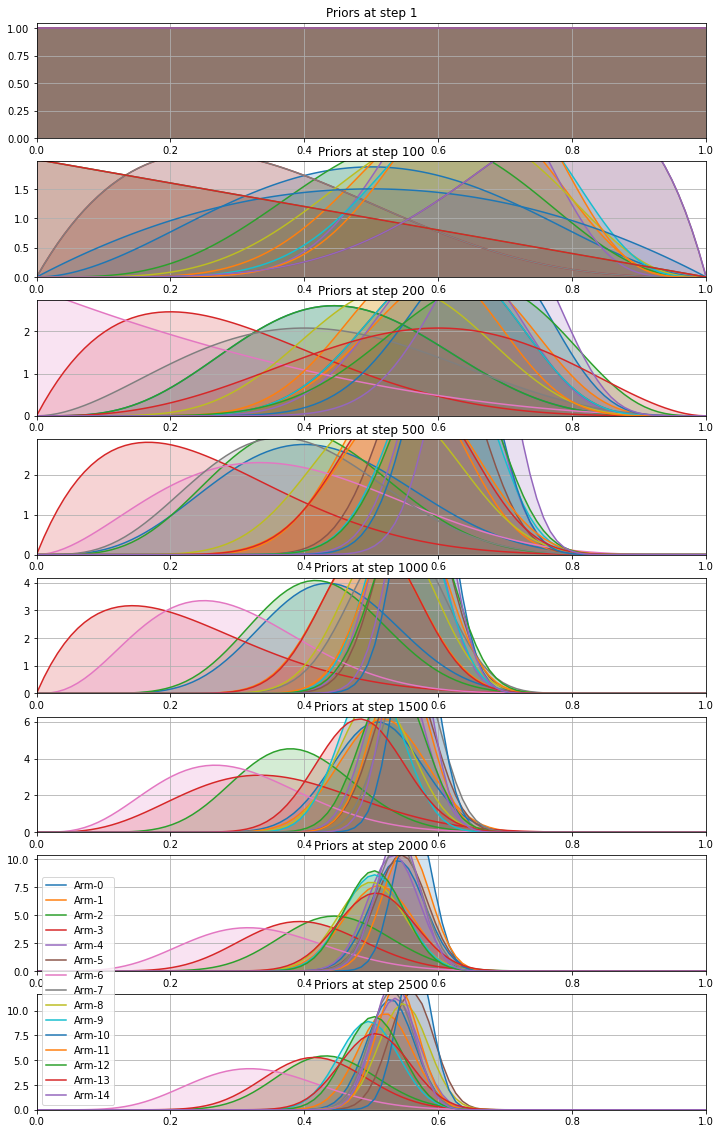

In [28]:
# Thompson Sampling Algorhithm

import scipy
import scipy.stats as stats

fig, axs = plt.subplots(len(plots), 1, figsize=(12, 20))
axs = axs.flat


trials = np.zeros(n_bandits)                # trials에는 각 bandit을 당길때마다 count를 늘려줍니다.
success = np.zeros(n_bandits)               # success에는 각 bandit을 당겨서 성공할때마다 count를 늘려줍니다.


# STEP 1 : 반복시행 하도록 알고리즘을 작성
for n in range(1, times+1):
    # STEP 2 : 각 bandit에 대한 사전분포(Beta distribution)를 업데이트.
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]

    # STEP 3 : 각 사전분포에서 하나의 샘플을 취합니다. 여기에서 Exploration을 할 수 있는 가능성을 얻는다.
    theta = [d.rvs(1) for d in bandit_priors]
    
    # STEP 4 : 가장 성공확률이 높은 bandit을 선택.
    chosen_bandit = np.argmax(theta)

    # STEP 5 : 해당 bandit을 당깁니다.
    outcome = pull(chosen_bandit)
    # STEP 6 : 시행횟수와 결과를 업데이트.
    trials[chosen_bandit] += 1
    success[chosen_bandit] += outcome

    # 시각화
    if n in plots:
        plot(bandit_priors, n, next(axs))    

print(theta)

In [29]:
print('추정 성공확률이 가장 높은 Arm은 ', np.argmax(theta))

추정 성공확률이 가장 높은 Arm은  10


저희 조에서는 일반적인 Thompson Sampling을 이용하여 Hidden Bandit A를 분석하고자 하였습니다.

저희 조에서 발견한 Hidden Bandit A의 성질은 각 팔들의 확률이 상당히 비슷하다는 점입니다. 
그 이유는 시각화를 통한 베타분포의 변화를 관찰했을 때, 학습과정이 진행되면서 각 Arm에 대응하는 베타분포의 평균들이 하나의 값으로 모이는 듯한 경향이 보이기 때문입니다.

이 Bandit에서 저희 조에서 가장 Reward가 클 것이라고 생각한 Arm은 10번째 Arm 입니다.
그 이유는 모델이 학습하여 최종적으로 추정한 확률분포 theta의 argmax의 최댓값이 10번째이기 때문입니다.


# Hidden Bandit B
두번째 벤딧은 리워드가 서로 다른 암으로 구성된 벤딧입니다.
특히 아주 낮은 확률로 엄청 큰 리워드를 얻거나, 엄청 작은 리워드를 얻는 벤딧이 포함되어 있습니다.
학생들이 확률뿐만 아니라, 리워드까지 고려하여 베타분포를 업데이트 해야함을 발견하는 것이 목표입니다.

In [47]:
## Hidden Bandit B [학생들에게는 공개되지 않습니다.]
'''
두번째 벤딧은 리워드가 서로 다른 암으로 구성된 벤딧입니다.
특히 아주 낮은 확률로 엄청 큰 리워드를 얻거나, 엄청 작은 리워드를 얻는 벤딧이 포함되어 있습니다.
학생들이 확률뿐만 아니라, 리워드까지 고려하여 베타분포를 업데이트 해야함을 발견하는 것이 목표입니다.
'''

n_bandits = 7
p_bandits = [0.0001, 0.0001, 0.2, 0.3, 0.4, 0.5, 0.8]
r_bandits = [1000000, 0.1, 900, 400, 500, 300, 100]

r = np.array(r_bandits)/np.max(r_bandits)

times = 5000

def pull(i):
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0

### 예시답안

In [48]:
# 학습하는 동안 베타분포의 변화를 관찰할 시각화 함수 구현
plots = [1, 100, 200, 500, 1000, 1500, 2000, 3000, 4000, 5000]    # 몇 번의 시행횟수마다 시각화를 할 것인지 설정


def plot(priors, step, ax):         # 사전분포와 단계, 그리고 ax 모듈 (빈 부분그림)을 받아서 그 위에 그리도록함.     
    plot_x = np.linspace(0.001, .999, 100)  # 정의역 설정
    
    for prior,i in zip(priors,range(len(priors))):            
        y = prior.pdf(plot_x)       # 각 벤딧의 사전분포의 pdf를 가져옴
        p = ax.plot(plot_x, y, label = f'Arm-{i}')      # p에는 사전분포의 그래프 그림이 담겨있음
        ax.fill_between(plot_x, y, 0, alpha=0.2)    # 그래프 아래 부분의 면적을 색칠함

        ax.set_xlim([0, 1])
        ax.set_ylim(bottom=0)
        ax.set_title(f'Priors at step {step:d}')
        ax.grid()
    if step == plots[-1]:
        plt.legend()


In [45]:
## Bandit B
'''
두번째 벤딧은 리워드가 서로 다른 암으로 구성된 벤딧입니다.
특히 아주 낮은 확률로 엄청 큰 리워드를 얻거나, 엄청 작은 리워드를 얻는 벤딧이 포함되어 있습니다.
학생들이 확률뿐만 아니라, 리워드까지 고려하여 베타분포를 업데이트 해야함을 발견하는 것이 목표입니다.
'''

n_bandits = 7
p_bandits = [0.0001, 0.0001, 0.2, 0.3, 0.4, 0.5, 0.8]
r_bandits = [1000000, 0.1, 900, 400, 500, 300, 100]

r = np.array(r_bandits)/np.max(r_bandits)

times = 5000

def pull(i):
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0

[0.0014992503748125937, 0.0014992503748125937, 0.0014997319034852545, 0.0014995862068965513, 0.0015000000000000002, 0.0015009497964721837, 0.0015009957325746808]


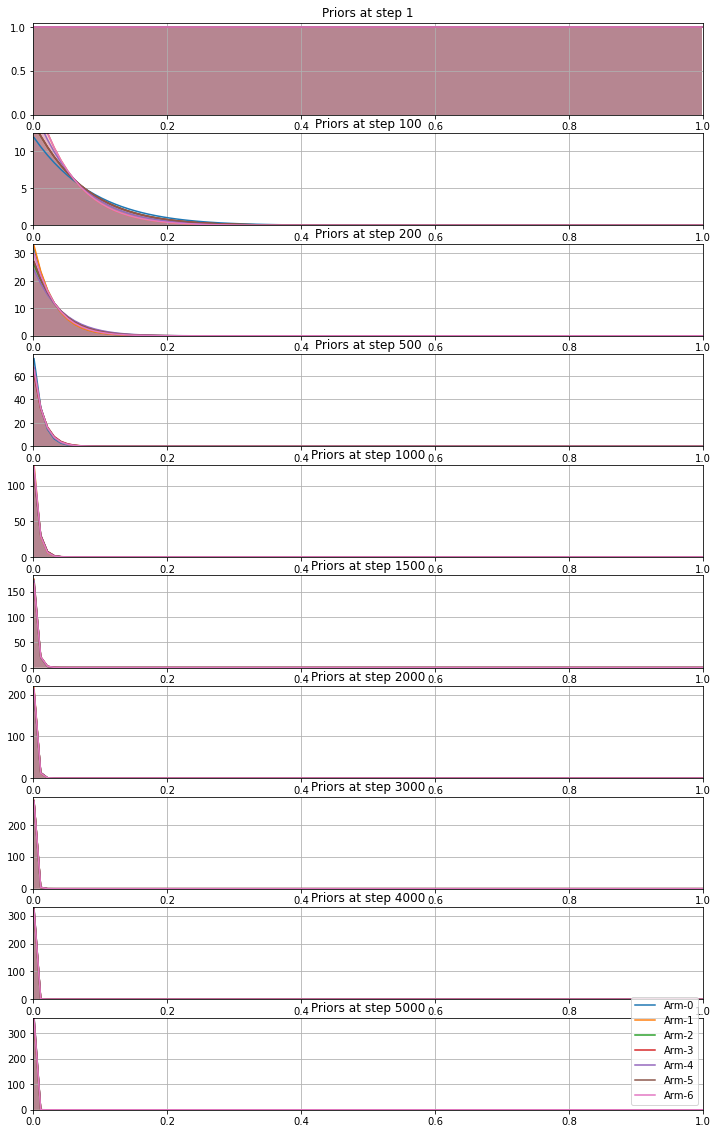

In [49]:
# Thompson Algorithm + Greedy Algorithm

fig, axs = plt.subplots(len(plots), 1, figsize=(12, 20))
axs = axs.flat

trials = np.zeros(n_bandits)                # trials에는 각 bandit을 당길때마다 count를 늘려줍니다.
success = np.zeros(n_bandits)               # success에는 각 bandit을 당겨서 성공할때마다 count를 늘려줍니다.


for n in range(1,times+1):
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]
    if n <= 3000: #시행횟수 3000번까지는 톰슨 샘플링을 합니다.
        theta = [d.rvs(1) for d in bandit_priors]
    else: #시행횟수가 3000번이 넘으면 greedy algorithm을 합니다.
        theta = [d.mean() for d in bandit_priors]
    chosen_bandit = np.argmax(theta)
    outcome = pull(chosen_bandit)
    trials[chosen_bandit] += 1
    success[chosen_bandit] += outcome * r[chosen_bandit] #reward가 arm마다 다르므로 업데이트합니다.
    

    # 시각화
    if n in plots:
        plot(bandit_priors, n, next(axs))


print(theta)

In [50]:
theta

[0.0014992503748125937,
 0.0014992503748125937,
 0.0014997319034852545,
 0.0014995862068965513,
 0.0015000000000000002,
 0.0015009497964721837,
 0.0015009957325746808]

In [51]:
np.argmax(np.array(r_bandits)*np.array(theta).T)

0

저희 조에서는 greedy algorithm을 사용하여 Hidden Bandit B를 분석하고자 하였으나 greedy algorithm은 history data가 충분해야 잘 작동하므로 시행횟수 3000번까지는 Tompson Sampling을 하고, 이후에는 greedy algorithm을 따르도록 하는 알고리즘을 작성하였습니다. 또한 리워드를 고려하여 distribution의 parameters를 결과에 reward 가중치를 곱하여 업데이트하도록 했습니다. 
시각화 자료와 얻어낸 theta를 통해 arm 중에 매우 낮은 성공확률을 가진 theta가 존재한다는 것을 확인하였습니다. 이는 시각화 자료에서 분포의 평균이 거의 0에 치우쳐져있고 실제로 결과로 얻어낸 성공 확률이 매우 작기 때문입니다.
또한 outcome에 reward를 곱하여 분포를 업데이트 했는데 mean reward가 가장 큰 arm의 성공확률이 매우 낮은 것을 고려하였을 때 이 arm이 성공확률은 매우 낮지만 reward가 다른 arm들에 비해 월등히 클 것이라고 예측됩니다. 

## Hidden Bandit C
Hidden Bandit C는 가장 어려운 벤딧입니다.
Hidden Bandit C는 변동확률 벤딧으로, 이 문제를 해결하기 위해서는 학생들이 관찰을 통해 Non-stationary 함을 발견하는 것과 이러한 상황에 대처할 수 있는 알고리즘을 스스로 조사하여 구현하는 것을 수행해야 합니다.

저희는 학생들이 이 문제가 이상하다는 것을 발견하는 것까지 목표로 하고 있습니다.
이렇게 하는 것을 통해서 Bandit 문제가 얼마든지 더 어려워질 수 있으며, 이번 캠프에서 공부한 것 이후로 어떤 더 많은 것을을 공부할 수 있을지 배울 수 있게 될 것이라 생각합니다.

In [2]:
# Hidden Bandit C [학생들에게는 공개되지는 않습니다.]
'''
Hidden Bandit C는 가장 어려운 벤딧입니다.
Hidden Bandit C는 변동확률 벤딧입니다.
이 문제를 해결하기 위해서는 학생들이 관찰을 통해 Non-stationary 함을 발견하는 것과
 이러한 상황에 대처할 수 있는 알고리즘을 스스로 조사하여 구현하는 것을 수행해야 합니다.
'''

n_bandits = 3
p_bandits = [0.45, 0.55, 0.60]
num_of_success = [0,0,0]
times = 10000

def pull(i):
    if np.random.rand() < p_bandits[i]:
        num_of_success[i] += 1
        if num_of_success[i] % 400 == 399:
            p_bandits[i] = p_bandits[i]*0.9
        return 1
    else :
        return 0

### 예시답안

In [3]:
# 학습하는 동안 베타분포의 변화를 관찰할 시각화 함수 구현
plots = [1, 100, 200, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]    # 몇 번의 시행횟수마다 시각화를 할 것인지 설정


def plot(priors, step, ax):         # 사전분포와 단계, 그리고 ax 모듈 (빈 부분그림)을 받아서 그 위에 그리도록함.     
    plot_x = np.linspace(0.001, .999, 100)  # 정의역 설정
    
    for prior,i in zip(priors,range(len(priors))):            
        y = prior.pdf(plot_x)       # 각 벤딧의 사전분포의 pdf를 가져옴
        p = ax.plot(plot_x, y, label = f'Arm-{i}')      # p에는 사전분포의 그래프 그림이 담겨있음
        ax.fill_between(plot_x, y, 0, alpha=0.2)    # 그래프 아래 부분의 면적을 색칠함

        ax.set_xlim([0, 1])
        ax.set_ylim(bottom=0)
        ax.set_title(f'Priors at step {step:d}')
        ax.grid()
        plt.subplots_adjust(hspace=1) #각 그래프들이 서로 겹치지 않게 세로 간격 조절.
    if step == plots[-1]:
        plt.legend()


[0.3333333333333333, 0.3487348734873487, 0.3333333333333333]


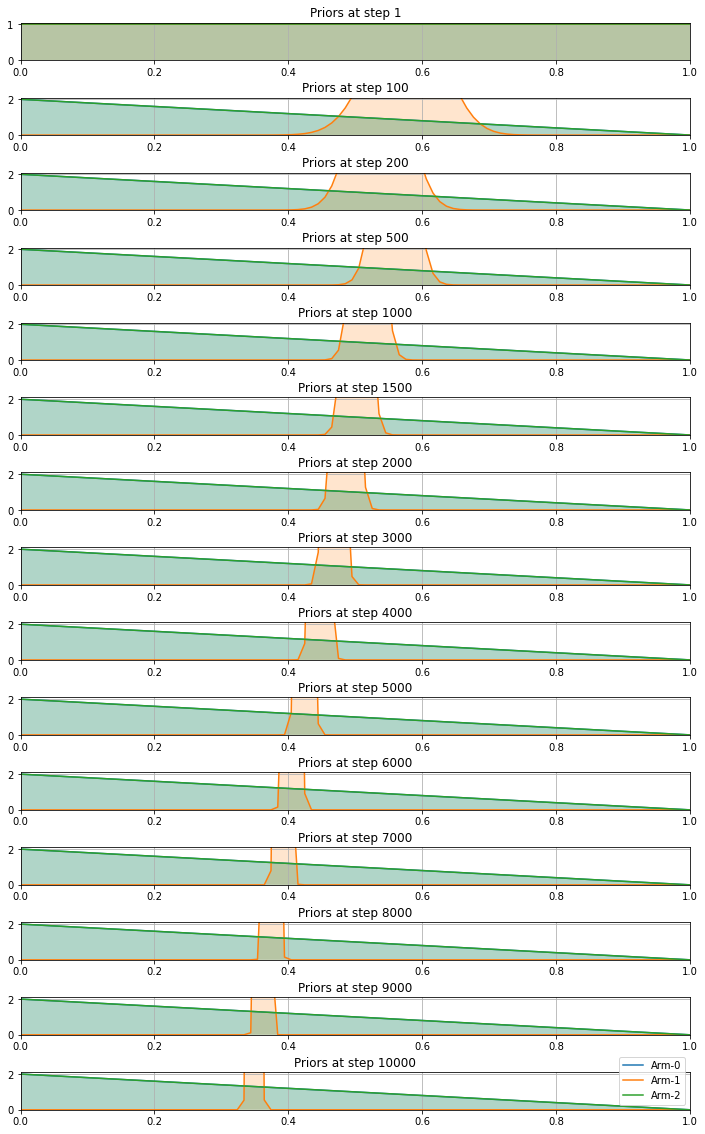

In [4]:
# Greedy Algorithm

fig, axs = plt.subplots(len(plots), 1, figsize=(12, 20))
axs = axs.flat


trials = np.zeros(n_bandits)
success = np.zeros(n_bandits)

for n in range(1,times+1):
    # 각 bandit에 대한 사전분포(Beta distribution) 및 모델 업데이트.
    bandit_priors = [stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, success)]
    theta = [d.mean() for d in bandit_priors]

    chosen_bandit = np.argmax(theta)
    outcome = pull(chosen_bandit)

    trials[chosen_bandit] += 1
    success[chosen_bandit] += outcome

    # 시각화
    if n in plots:
        plot(bandit_priors, n, next(axs))


print(theta)

저희 조가 관찰하기에 이 벤딧은 점점 성공확률이 감소하는 것 같습니다.
그 이유는 시행횟수가 늘어가면서 베타분포의 평균이 점점 좌측으로 이동하기 때문입니다.
그런데 이렇게 성공확률이 변화하는 상황에서 저희가 공부한 알고리즘이 잘 작동할 지는 의문입니다.
저희 조에서 조사한 결과 이런 벤딧 문제를 Non-stationary라고 하며, 이 문제를 해결하기 위해서는 조금 더 어려운 알고리즘을 사용해야 한다고 합니다.
추후에 더욱 연구하여 이런 문제도 해결할 수 있길 바랍니다.